# Proposition 64 analysis

Classes from the Ben Welsh online course.

## Chapter 5

In [4]:
import pandas as pd

In [5]:
%matplotlib inline

#### Import the propositions CSV and check its contents

In [6]:
props = pd.read_csv("http://first-python-notebook.readthedocs.io/_static/committees.csv")

In [7]:
props.head(1)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
0,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,382,1374469,YES ON PROPOSITION 51 - CALIFORNIANS FOR QUALI...,SUPPORT


In [8]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ocd_prop_id               102 non-null object
calaccess_prop_id         102 non-null int64
ccdc_prop_id              102 non-null int64
prop_name                 102 non-null object
ccdc_committee_id         102 non-null int64
calaccess_committee_id    102 non-null int64
committee_name            102 non-null object
committee_position        102 non-null object
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


#### Import the contributions CSV and check its contents

In [9]:
contribs = pd.read_csv("http://first-python-notebook.readthedocs.io/_static/contributions.csv")

In [10]:
contribs.head()

,calaccess_committee_id,committee_name,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,BERGMAN,GRETCHEN,SPRING VALLEY,CA,91978,A NEW PATH,EXECUTIVE DIRECTOR,False,84.0
1,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,KAHLE,MYRNA,SAN DIEGO,CA,92109,NATIONAL SCHOOL DISTRICT,TEACHER,False,35.0
2,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-15,MCDEVITT,LEO,ESCONDIDO,CA,92025,LIFE IONIZERS,SEO/CONTENT MANAGER,False,198.0
3,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-08-10,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,False,-50.0
4,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-26,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,True,50.0


In [11]:
contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56379 entries, 0 to 56378
Data columns (total 13 columns):
calaccess_committee_id          56379 non-null int64
committee_name                  56379 non-null object
calaccess_filing_id             56379 non-null int64
date_received                   56379 non-null object
contributor_lastname            56375 non-null object
contributor_firstname           53411 non-null object
contributor_city                56369 non-null object
contributor_state               56363 non-null object
contributor_zip                 56366 non-null object
contributor_employer            48572 non-null object
contributor_occupation          53273 non-null object
contributor_is_self_employed    56379 non-null bool
amount                          56379 non-null float64
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 5.2+ MB


## Chapter 6

### Which proposition had the most committees?

In [12]:
props.prop_name.value_counts()

PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE CRIMINAL PROCEEDINGS AND SENTENCING. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.                           13
PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTHCARE, TOBACCO USE PREVENTION, RESEARCH, AND LAW ENFORCEMENT. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.    12
PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.                                                                                                   11
PROPOSITION 066- DEATH PENALTY. PROCEDURES. INITIATIVE STATUTE.                                                                                                 9
PROPOSITION 055 - TAX EXTENSION TO FUND EDUCATION AND HEALTHCARE. INITIATIVE CONSTITUTIONAL AMENDMENT.                                                          8
PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON SINGLE-USE PLASTIC BAGS.                                                                                         7
PROPOSITION 062- DEATH PENAL

In [13]:
props.prop_name.value_counts().reset_index()

,index,prop_name
0,PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE...,13
1,PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTH...,12
2,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,11
3,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,9
4,PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...,8
5,PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON...,7
6,PROPOSITION 062- DEATH PENALTY. INITIATIVE STA...,7
7,"PROPOSITION 059- SB 254 (CHAPTER 20, STATUTES ...",6
8,PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...,4
9,PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...,4


## Chapter 7

### Who were the biggest donors both for and against Proposition 64?

In [14]:
prop_64 = props[props.prop_name == "PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE."]

In [15]:
prop_64.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
74,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT
75,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,457,1382525,NEW APPROACH PAC (MPO),SUPPORT
76,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,458,1376077,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",SUPPORT
77,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE
78,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,460,1371855,"MARIJUANA POLICY PROJECT OF CALIFORNIA, YES ON 64",SUPPORT


In [16]:
prop_64.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 74 to 84
Data columns (total 8 columns):
ocd_prop_id               11 non-null object
calaccess_prop_id         11 non-null int64
ccdc_prop_id              11 non-null int64
prop_name                 11 non-null object
ccdc_committee_id         11 non-null int64
calaccess_committee_id    11 non-null int64
committee_name            11 non-null object
committee_position        11 non-null object
dtypes: int64(4), object(4)
memory usage: 792.0+ bytes


## Chapter 8
(Continuing question about biggest donors)

In [17]:
contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56379 entries, 0 to 56378
Data columns (total 13 columns):
calaccess_committee_id          56379 non-null int64
committee_name                  56379 non-null object
calaccess_filing_id             56379 non-null int64
date_received                   56379 non-null object
contributor_lastname            56375 non-null object
contributor_firstname           53411 non-null object
contributor_city                56369 non-null object
contributor_state               56363 non-null object
contributor_zip                 56366 non-null object
contributor_employer            48572 non-null object
contributor_occupation          53273 non-null object
contributor_is_self_employed    56379 non-null bool
amount                          56379 non-null float64
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 5.2+ MB


In [18]:
merged = pd.merge(prop_64, contribs, on="calaccess_committee_id")

In [19]:
merged.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-02-04,BRADEN QUIGLEY,LAURA,SACRAMENTO,CA,95825,LBQ STRATEGIES,CONSULTANT,False,100.0
1,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
2,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-29,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
3,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-03-28,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
4,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,DRUG POLICY ACTION,NaN,NEW YORK,NY,10001,NaN,NaN,False,250000.0


In [20]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 859
Data columns (total 20 columns):
ocd_prop_id                     860 non-null object
calaccess_prop_id               860 non-null int64
ccdc_prop_id                    860 non-null int64
prop_name                       860 non-null object
ccdc_committee_id               860 non-null int64
calaccess_committee_id          860 non-null int64
committee_name_x                860 non-null object
committee_position              860 non-null object
committee_name_y                860 non-null object
calaccess_filing_id             860 non-null int64
date_received                   860 non-null object
contributor_lastname            860 non-null object
contributor_firstname           750 non-null object
contributor_city                860 non-null object
contributor_state               860 non-null object
contributor_zip                 860 non-null object
contributor_employer            657 non-null object
contributor_occu

## Chapter 9
(Continuing, determine which side got more donations)

In [21]:
merged.amount.sum()

35177017.640000001

Number of individual donations for each side:

In [22]:
merged.committee_position.value_counts()

SUPPORT    762
OPPOSE      98
Name: committee_position, dtype: int64

Create two variables to separate the two kinds of donation and do the math for the totals in dollars and the percentages of the full amount donated:

In [23]:
support = merged[merged.committee_position == "SUPPORT"]

In [24]:
oppose = merged[merged.committee_position == "OPPOSE"]

In [25]:
support.amount.sum()

32675806.0

In [26]:
oppose.amount.sum()

2501211.6400000001

In [27]:
support.amount.sum() / merged.amount.sum()

0.92889642704798669

In [28]:
oppose.amount.sum() / merged.amount.sum()

0.071103572952013333

## Chapter 10
(Continuing question about biggest donors)

### Who are the main employers of the contributors?

In [29]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 859
Data columns (total 20 columns):
ocd_prop_id                     860 non-null object
calaccess_prop_id               860 non-null int64
ccdc_prop_id                    860 non-null int64
prop_name                       860 non-null object
ccdc_committee_id               860 non-null int64
calaccess_committee_id          860 non-null int64
committee_name_x                860 non-null object
committee_position              860 non-null object
committee_name_y                860 non-null object
calaccess_filing_id             860 non-null int64
date_received                   860 non-null object
contributor_lastname            860 non-null object
contributor_firstname           750 non-null object
contributor_city                860 non-null object
contributor_state               860 non-null object
contributor_zip                 860 non-null object
contributor_employer            657 non-null object
contributor_occu

In [30]:
merged.contributor_employer.value_counts()

NONE                                       94
RETIRED                                    10
LOS ANGELES DEPARTMENT OF WATER & POWER     7
APPLE, INC.                                 6
STATE OF CALIFORNIA                         6
SELF                                        5
MICROSOFT                                   5
NETZER & MALMO                              5
BOSTON SCIENTIFIC                           5
JULIE JOLLEY                                5
SOUTHERN CALIFORNIA EDISON                  5
SQUARECHICKEN MEDIA                         4
DESIGN OCTAVES, INC.                        4
USA TRUCK                                   4
MOTOROLA                                    4
FLOW KANA                                   3
MCELFRESH LAW                               3
DAN VIETS ATTORNEY AT LAW                   3
JOHN DUREE                                  3
KHURSID KHOJA                               3
TERRA VISTA MANAGEMENT INC.                 3
THE SEASTEADING INSTITUTE         

### What were the ten biggest contributions?

In [60]:
merged.sort_values("amount", ascending=False).head(10)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
142,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,PARKER AND AFFILIATED ENTITIES,SEAN,PALO ALTO,CA,94301,NaN,NaN,False,4000000.0
79,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",NaN,SACRAMENTO,CA,95815,NaN,NaN,False,2000000.0
846,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,464,1385506,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",SUPPORT,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",2083608,2016-09-15,FUND FOR POLICY REFORM (NONPROFIT 501 (C)(4)),NaN,NEW YORK,NY,10019,NaN,NaN,False,1970000.0
851,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-09-15,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1970000.0
852,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-09-27,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1403000.0
141,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-07-01,PARKER AND AFFILIATED ENTITIES,SEAN,PALO ALTO,CA,94301,NaN,NaN,False,1250000.0
78,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-07-07,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",NaN,SACRAMENTO,CA,95815,NaN,NaN,False,1000000.0
143,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-16,PARKER AND AFFILIATED ENTITIES,SEAN,PALO ALTO,CA,94301,NaN,NaN,False,1000000.0
253,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,457,1382525,NEW APPROACH PAC (MPO),SUPPORT,NEW APPROACH PAC (MPO),2063087,2016-06-30,VAN AMERINGEN,HENRY,NEW YORK,NY,10011,NaN,RETIRED,False,1000000.0
259,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,458,1376077,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",SUPPORT,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",1982136,2015-04-16,"GHOST MANAGEMENT GROUP, LLC DBA WEEDMAPS",NaN,IRVINE,CA,92618,NaN,NaN,False,1000000.0


### Who were the main donators to oppose the proposition?

In [32]:
oppose.amount.max()

1000000.0

In [33]:
oppose.sort_values("amount", ascending=False)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
839,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",2083142,2016-07-20,SCHAUER,JULIE,OAKS,PA,19456,NaN,RETIRED,False,1000000.0
312,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2098048,2016-09-27,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,400000.0
310,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2083071,2016-09-15,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,225000.0
308,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2083071,2016-09-12,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,200000.0
840,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",2083142,2016-07-25,SCHAUER,JULIE,OAKS,CA,19456,NaN,RETIRED,False,150000.0
837,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",2064155,2016-06-08,SCHAUER,JULIE,OAKS,PA,19456,NaN,RETIRED,False,120000.0
838,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",2064155,2016-06-13,SCHAUER,JULIE,OAKS,PA,19456,NaN,RETIRED,False,45000.0
287,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2064127,2016-06-13,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,36000.0
836,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",2064155,2016-05-20,SCHAUER,JULIE,OAKS,PA,19456,NaN,RETIRED,False,35000.0
306,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2083071,2016-09-07,"CALIFORNIANS FOR JOBS, ASSEMBLYMEMBER JIM COOP...",NaN,SACRAMENTO,CA,95815,NaN,NaN,False,25000.0


## Chapter 11

### Which committees have raised the most money?

In [34]:
merged.groupby("committee_name_x").amount.sum().reset_index().sort_values("amount", ascending=False)

,committee_name_x,amount
10,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",15734047.00
4,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),6140000.00
3,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",4470000.00
7,NEW APPROACH PAC (MPO),3865000.00
9,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",1364000.00
8,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",1130930.00
1,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",860470.00
2,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",850000.00
5,"MARIJUANA POLICY PROJECT OF CALIFORNIA, YES ON 64",739200.00
0,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,17089.00


### Who were the top contributors?

In [35]:
merged.groupby(["contributor_firstname", "contributor_lastname", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False)

,contributor_firstname,contributor_lastname,committee_position,amount
483,SEAN,PARKER AND AFFILIATED ENTITIES,SUPPORT,7250000.0
482,SEAN,PARKER,SUPPORT,1500000.0
281,JULIE,SCHAUER,OPPOSE,1364000.0
108,DANIEL,LEWIS,SUPPORT,1250000.0
194,HENRY,VAN AMERINGEN,SUPPORT,1000000.0
405,NICHOLAS,PRITZKER,SUPPORT,900000.0
421,PETER,THIEL,SUPPORT,300000.0
456,ROGER,JENKINS,SUPPORT,75000.0
23,ANGELA,HOWARD,SUPPORT,65000.0
322,LAWRENCE,HESS,SUPPORT,30000.0


### What percentage of donations came from people who live outside of California?

In [36]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 859
Data columns (total 20 columns):
ocd_prop_id                     860 non-null object
calaccess_prop_id               860 non-null int64
ccdc_prop_id                    860 non-null int64
prop_name                       860 non-null object
ccdc_committee_id               860 non-null int64
calaccess_committee_id          860 non-null int64
committee_name_x                860 non-null object
committee_position              860 non-null object
committee_name_y                860 non-null object
calaccess_filing_id             860 non-null int64
date_received                   860 non-null object
contributor_lastname            860 non-null object
contributor_firstname           750 non-null object
contributor_city                860 non-null object
contributor_state               860 non-null object
contributor_zip                 860 non-null object
contributor_employer            657 non-null object
contributor_occu

Contributions from each state:

In [37]:
merged.groupby("contributor_state").amount.sum().reset_index().sort_values("amount", ascending=False)

,contributor_state,amount
4,CA,17491193.00
8,DE,6140100.00
20,NY,5446985.00
7,DC,2618600.00
9,FL,1250850.00
24,PA,1215475.00
27,VA,895243.64
28,WA,50800.00
5,CO,39300.00
12,IL,7000.00


Contributions from California

In [38]:
california_contribs = merged[merged.contributor_state == "CA"]

In [39]:
california_contribs.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-02-04,BRADEN QUIGLEY,LAURA,SACRAMENTO,CA,95825,LBQ STRATEGIES,CONSULTANT,False,100.0
1,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
2,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-29,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
3,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-03-28,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
6,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-03-24,EMERY,DEWIGHT,SAN JOSE,CA,95121,APPLIANCE TECH NOW,APPLIANCE TECHNICIAN,False,100.0


Contributions from outside California

In [40]:
outside_contribs = merged[merged.contributor_state != "CA"]

In [41]:
outside_contribs.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
4,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,DRUG POLICY ACTION,NaN,NEW YORK,NY,10001,NaN,NaN,False,250000.0
5,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-02-02,DRUG POLICY ACTION,NaN,NEW YORK,NY,10001,NaN,NaN,False,250000.0
9,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-06,NEW APPROACH PAC (MPO),NaN,WASHINGTON,DC,20036,NaN,NaN,False,250000.0
20,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2064423,2016-06-30,BURHANS,BRIAN,SEATTLE,WA,98115,KING COUNTY,LIGHT RAIL TRAIN OPERATOR,False,100.0
44,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2064423,2016-04-01,NEW APPROACH PAC (MPO),NaN,WASHINGTON,DC,20036,NaN,NaN,False,500000.0


In [42]:
outside_contribs.amount.sum()

17685824.640000001

In [43]:
california_contribs.amount.sum()

17491193.0

In [44]:
outside_contribs.amount.sum() / merged.amount.sum()

0.50276646022115701

<u>Conclusion</u>: Aprox. 50.27% (the majority) of the amount contributed came from outside California.

### What are the top employers of donors who gave for and against the measure?

In [45]:
oppose.contributor_employer.value_counts()

BOSTON SCIENTIFIC                         5
RETIRED                                   4
STATE OF CALIFORNIA                       4
SELF                                      3
CITY OF SUNNYVALE                         2
CSI                                       2
NONE                                      2
CITY OF HUNTINGTON BEACH                  1
BELMONT POLICE DEPT                       1
SEFF                                      1
CCC PROBATION                             1
AEROWIND CORP                             1
SFWKC                                     1
PRECISION                                 1
CNOA                                      1
CITY OF ARCADIA                           1
AMADOR COUNTY SHERIFF'S OFFICE            1
CS                                        1
CALIFORNIA INSTITUTE OF TECHNOLOGY        1
CITY OF VENTURA                           1
CITY OF IMPERIAL                          1
CITY OF WATSONVILLE                       1
CITY OF ROCKLIN                 

In [46]:
support.contributor_employer.value_counts()

NONE                                       92
LOS ANGELES DEPARTMENT OF WATER & POWER     7
RETIRED                                     6
APPLE, INC.                                 6
SOUTHERN CALIFORNIA EDISON                  5
JULIE JOLLEY                                5
MICROSOFT                                   5
NETZER & MALMO                              5
SQUARECHICKEN MEDIA                         4
USA TRUCK                                   4
MOTOROLA                                    4
DESIGN OCTAVES, INC.                        4
JOHN DUREE                                  3
TORTUGA ADVISERS LLC                        3
MCELFRESH LAW                               3
FLOW KANA                                   3
LONZA BIOSCIENCE                            3
THE SEASTEADING INSTITUTE                   3
PHYSICAL OPTICS CORPORATION                 3
DAN VIETS ATTORNEY AT LAW                   3
DION MARKGRAAFF, CONSULTANT                 3
TEKSYSTEMS                        

### Which committees had the fewest donors?

In [47]:
merged.committee_name_x.value_counts().sort_values().reset_index()

,index,committee_name_x
0,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",2
1,MOMS STRONG AGAINST PROP 64,4
2,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",6
3,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",7
4,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),8
5,NEW APPROACH PAC (MPO),9
6,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,26
7,"MARIJUANA POLICY PROJECT OF CALIFORNIA, YES ON 64",40
8,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",88
9,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",250


## Chapter 15
### Making a graph of the top supporters

In [48]:
top_supporters = support.groupby(["contributor_firstname", "contributor_lastname"]).amount.sum().reset_index().sort_values("amount", ascending=False)

In [49]:
top_supporters.head(5)

,contributor_firstname,contributor_lastname,amount
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0
443,SEAN,PARKER,1500000.0
102,DANIEL,LEWIS,1250000.0
180,HENRY,VAN AMERINGEN,1000000.0
374,NICHOLAS,PRITZKER,900000.0


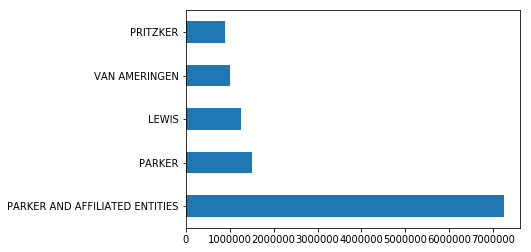

In [50]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_lastname)

## Chapter 16
### Creating better labels and merging two instances of the same donator

In [51]:
top_supporters["contributor_fullname"] = top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname

In [52]:
top_supporters.head()

,contributor_firstname,contributor_lastname,amount,contributor_fullname
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0,SEAN PARKER AND AFFILIATED ENTITIES
443,SEAN,PARKER,1500000.0,SEAN PARKER
102,DANIEL,LEWIS,1250000.0,DANIEL LEWIS
180,HENRY,VAN AMERINGEN,1000000.0,HENRY VAN AMERINGEN
374,NICHOLAS,PRITZKER,900000.0,NICHOLAS PRITZKER


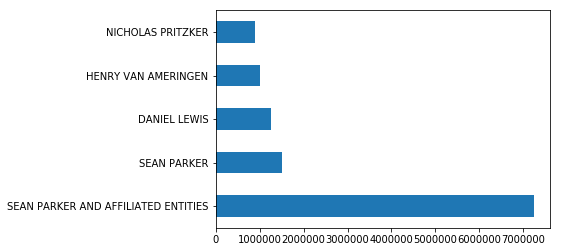

In [53]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname)

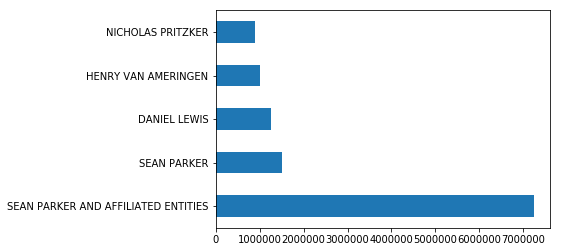

In [54]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_fullname)

In [55]:
top_supporters.head(5).to_csv("top_supporters.csv")

In [56]:
def combine_names(row):
    if row.contributor_fullname.startswith("SEAN PARKER"):
        return "SEAN PARKER"
    return row.contributor_fullname

In [57]:
top_supporters.apply(combine_names, axis=1)

444                   SEAN PARKER
443                   SEAN PARKER
102                  DANIEL LEWIS
180           HENRY VAN AMERINGEN
374             NICHOLAS PRITZKER
390                   PETER THIEL
421                 ROGER JENKINS
22                  ANGELA HOWARD
297                 LAWRENCE HESS
425              ROGER B. MCNAMEE
205                    JASON POST
506          ZACHARY PYM WILLIAMS
222                JEREMY ZACHARY
295               LAURIE BENENSON
333            MARY QUINN DELANEY
449            SHARON K. CHRISTIE
61                  CAMILLA FIELD
476                  TERRY TURNER
278                KHURSHID KHOJA
257                 JULI CROCKETT
141                 DOUG LANPHERE
147                  EMILY PAXHIA
383             PATRICK MCMANAMON
352             MICHAEL STEINMETZ
347                 MICHAEL KLEIN
446                    SHARI FOOS
73                  CHARLES ROVEN
468                 STEVEN PERSKY
479              THOMAS J. REIMAN
464           

In [58]:
top_supporters["contributor_cleanname"] = top_supporters.apply(combine_names, axis=1)

In [59]:
top_supporters.groupby("contributor_cleanname").amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

,contributor_cleanname,amount
443,SEAN PARKER,8750000.0
102,DANIEL LEWIS,1250000.0
180,HENRY VAN AMERINGEN,1000000.0
374,NICHOLAS PRITZKER,900000.0
390,PETER THIEL,300000.0
422,ROGER JENKINS,75000.0
22,ANGELA HOWARD,65000.0
297,LAWRENCE HESS,30000.0
505,ZACHARY PYM WILLIAMS,10000.0
421,ROGER B. MCNAMEE,10000.0


------ Basic excercises finish here. -------

## Module 2, discussion question 1
New question about the data

### Question: apart from California, what were the top states with contributors that supported Proposition 64?